In [28]:
import numpy as np
import pandas as pd



In [107]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
data = pd.read_csv('u.data', sep ='\t', names=column_names)

In [11]:
data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [34]:
movie_titles = pd.read_csv('https://cdncontribute.geeksforgeeks.org/wp-content/uploads/Movie_Id_Titles.csv') 
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [37]:
data=pd.merge(data,movie_titles, on='item_id')
data.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [58]:
#Exploritory data analysis 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline 

In [43]:

#Create a rating data frame, with avg rating and number of ratings
data.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [44]:
# The issue is that we don't know how many ppl gave a score of 5, it could be just 1 person
# The fix would be to sort in terms of number of ratings
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [53]:

#Get the number of rating column  ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count()) 

ratings = pd.DataFrame(data.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [56]:
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
ratings.head()



,rating,num of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


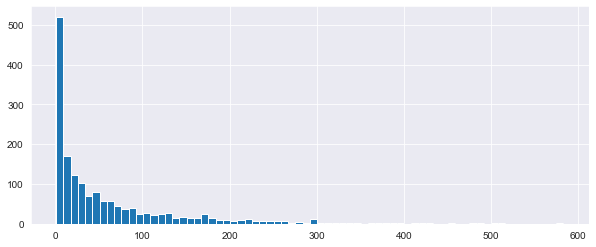

In [65]:

#Plotting a graph with the number of ratings column 
plt.figure(figsize = (10,4))
ratings['num of ratings'].hist(bins=70)

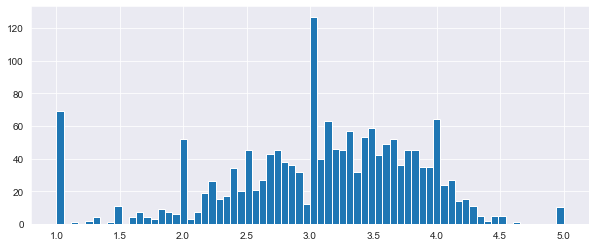

In [67]:
#Creating a histogram for the ratings 
plt.figure(figsize = (10,4))
ratings['rating'].hist(bins=70)

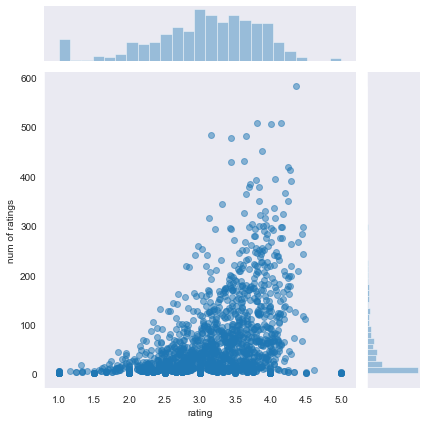

In [76]:
#Lets do an histogram over scatter plot to see rating and number of ratings
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)
#sns.jointplot(x='rating',y='num of ratings',new_data=ratings, alpha=0.5)

In [82]:
#Done with vizualization, now onto recommending
#Creatiting a maxtrix with user_id and titles
#Each cell will concist of the user rating for that movie
#Many cells would be NaN as not every user has rated every movie

movie_matrix = data.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [85]:
#Get a table of most rated movies
most_rated = ratings.sort_values('num of ratings', ascending = False)
most_rated.head(10)

,rating,num of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [92]:
contact_ratings = movie_matrix['Contact (1997)']
contact_ratings.head()



user_id
1    5.0
2    3.0
3    2.0
4    5.0
5    NaN
Name: Contact (1997), dtype: float64

In [93]:
fargo_ratings = movie_matrix['Fargo (1996)']
fargo_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    NaN
5    5.0
Name: Fargo (1996), dtype: float64

In [95]:
#Creating correlations 
similar_to_contact = movie_matrix.corrwith(contact_ratings)
similar_to_fargo   = movie_matrix.corrwith(fargo_ratings)

/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Users/mac/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [99]:
#Removing the NaN
#corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])
#corr_starwars.dropna(inplace=True)
#corr_starwars.head()
correlation_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
correlation_contact.head()

,Correlation
title,
'Til There Was You (1997),0.904534
1-900 (1994),NaN
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512


In [100]:
#Cleaning data by dropping NA items
correlation_contact.dropna(inplace=True)
correlation_contact.head().head()

,Correlation
title,
'Til There Was You (1997),0.904534
101 Dalmatians (1996),-0.108441
12 Angry Men (1957),0.022265
187 (1997),0.135512
2 Days in the Valley (1996),0.248031


In [102]:
#Til There was you has the highest correlation with contact, so it would be recommended
#Now we will sort to see who has the highest correlation
correlation_contact.sort_values('Correlation',ascending=False).head()

,Correlation
title,
Lamerica (1994),1.0
Faust (1994),1.0
"Wedding Gift, The (1994)",1.0
"Visitors, The (Visiteurs, Les) (1993)",1.0
King of the Hill (1993),1.0


In [103]:
#Lets get the number of ratings
correlation_contact=correlation_contact.join(ratings['num of ratings'])
correlation_contact.head()

,Correlation,num of ratings
title,,
'Til There Was You (1997),0.904534,9
101 Dalmatians (1996),-0.108441,109
12 Angry Men (1957),0.022265,125
187 (1997),0.135512,41
2 Days in the Valley (1996),0.248031,93


In [106]:
#Lets display only values with more than 100 ratings
correlation_contact_100=correlation_contact[correlation_contact['num of ratings']>100]
correlation_contact_100=correlation_contact_100.sort_values("Correlation", ascending = False)
correlation_contact_100.head()


,Correlation,num of ratings
title,,
Contact (1997),1.000000,509
Philadelphia (1993),0.446509,137
"Mask, The (1994)",0.418328,129
Young Guns (1988),0.388839,101
Sling Blade (1996),0.384840,136
